<a href="https://colab.research.google.com/github/Mariam-Elbishbeashy/Credit_Card_Approval_Prediction_ML/blob/main/AiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, cohen_kappa_score, log_loss, matthews_corrcoef, fbeta_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#Multi-layer preception (MLP) imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
#Random Forest Model imports
from sklearn.ensemble import RandomForestClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the First Dataset From the Drive (application_record.csv)

In [5]:
#read data
df = pd.read_csv('/content/drive/MyDrive/application_record.csv')

# Reading the Second Dataset From the Drive (credit_record.csv)

In [6]:
df_target = pd.read_csv('/content/drive/MyDrive/credit_record.csv')

# Sanity Check for the Data

In [7]:
#Shape of the data
df.shape

(438557, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
#Number of missing values
df.isnull().sum()
#Result: OCCUPATION_TYPE is the only column with missing values

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [10]:
#Percentage of missing values in a column
(df.isnull().sum()/df.shape[0])*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


In [11]:
#Number of unique records in a column
unique_counts = df.nunique()
print(unique_counts)

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


In [12]:
# Showing ID's that are duplicated
id_counts = df['ID'].value_counts()

# Filter for IDs that appear more than once
duplicate_ids_summary = id_counts[id_counts > 1]

print(duplicate_ids_summary)
#Found that all duplicated IDs don't exist at the second dataset with the target

ID
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
7602432    2
7036518    2
7045885    2
7618285    2
7089090    2
7052783    2
7416167    2
7023108    2
7045794    2
7053557    2
7207977    2
7836711    2
7772847    2
7154819    2
7052812    2
7099881    2
7022327    2
7833087    2
7743418    2
7836971    2
7372589    2
7636756    2
7636389    2
7213374    2
7317997    2
7838075    2
7023651    2
7155150    2
7091721    2
7046068    2
7742298    2
7744386    2
7702516    2
7022197    2
7154598    2
7742853    2
7090931    2
7135270    2
7024111    2
7174719    2
7603224    2
7576316    2
Name: count, dtype: int64


In [13]:
#identifying garbage values
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("****"*10)

#Result: No garbage values

CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
****************************************
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
****************************************
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
****************************************
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow            

## Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [15]:
df.describe(include = "object")

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


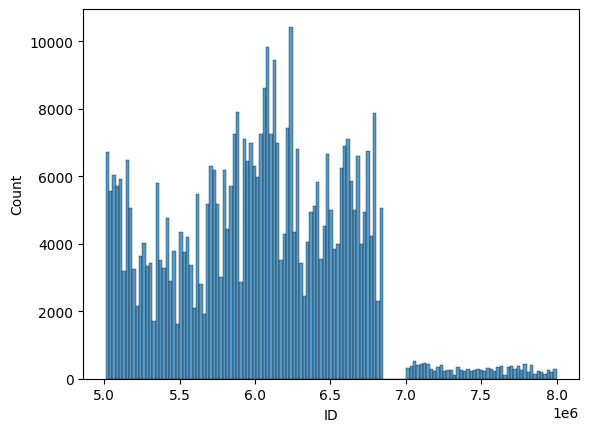

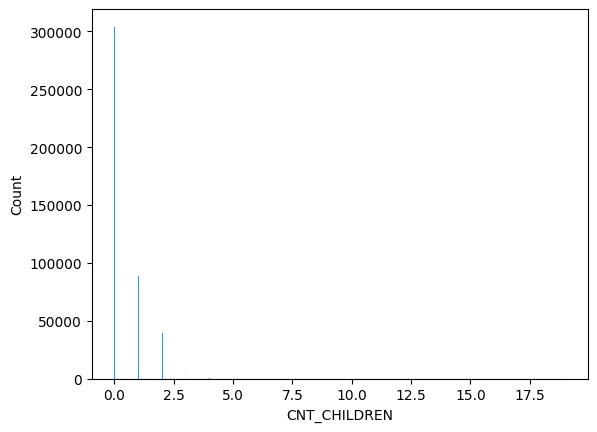

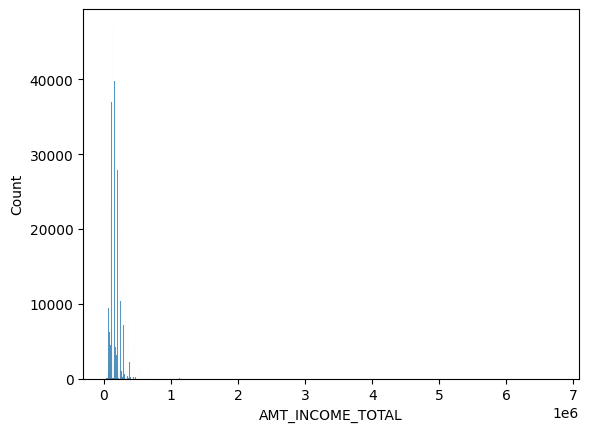

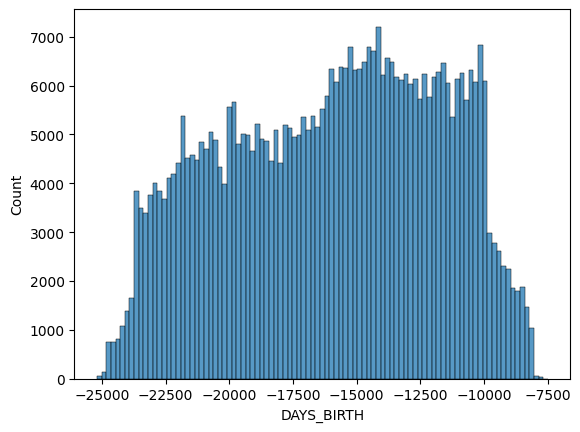

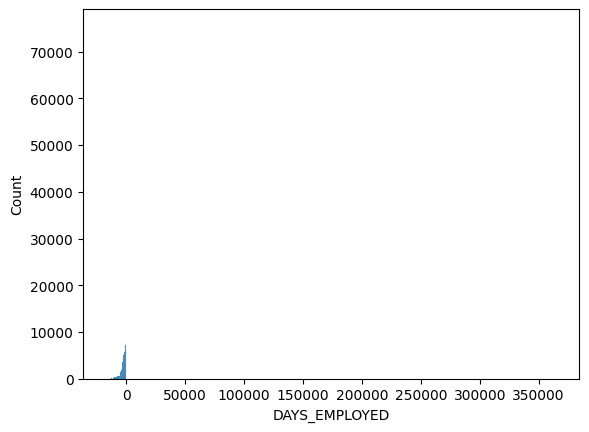

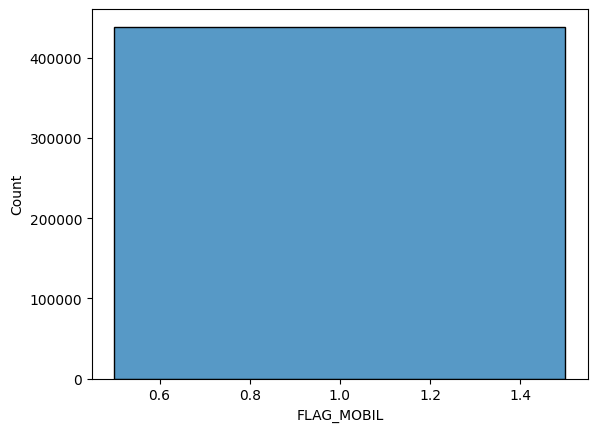

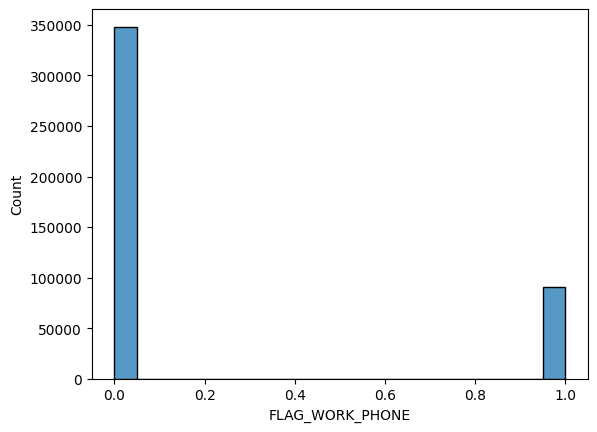

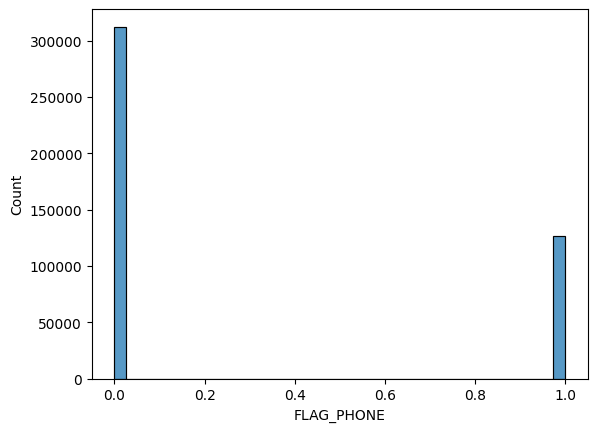

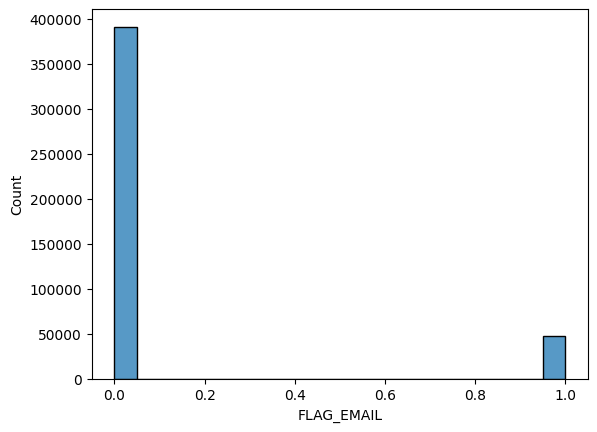

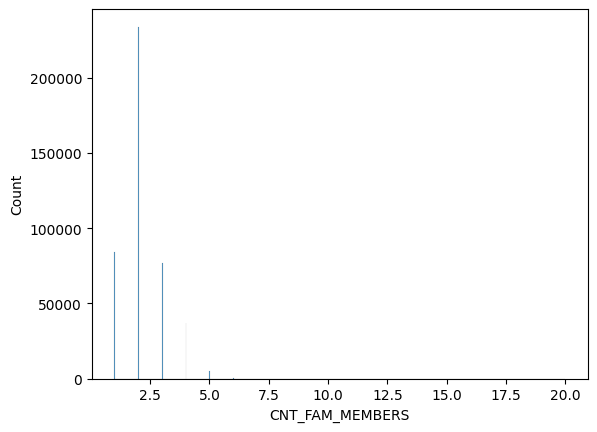

In [16]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [17]:
df.shape

(438557, 18)

### - Detecting Outliers

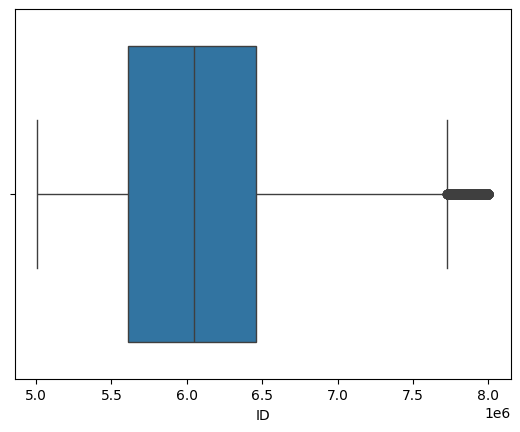

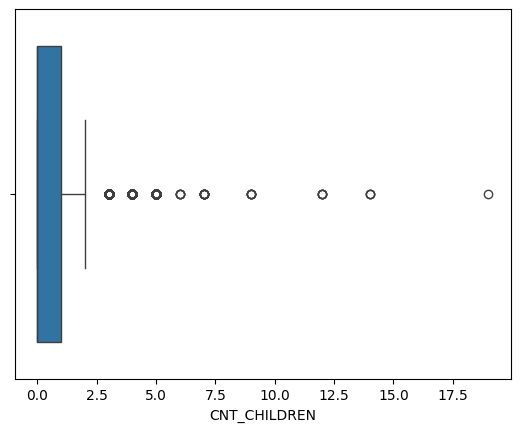

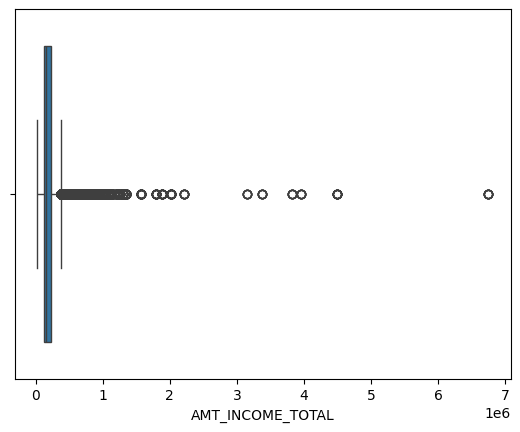

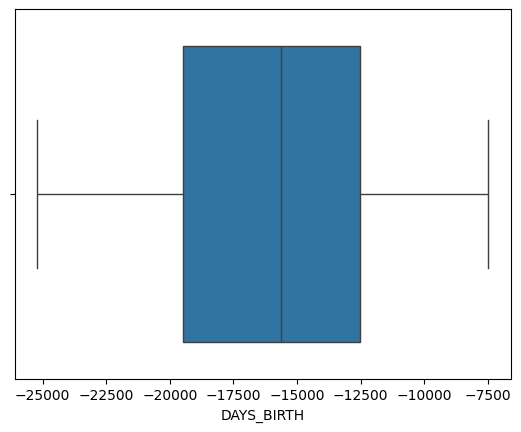

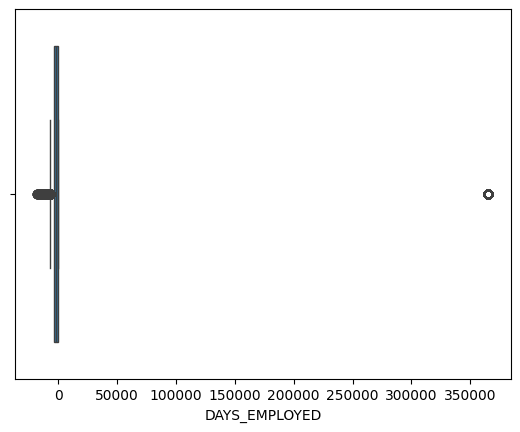

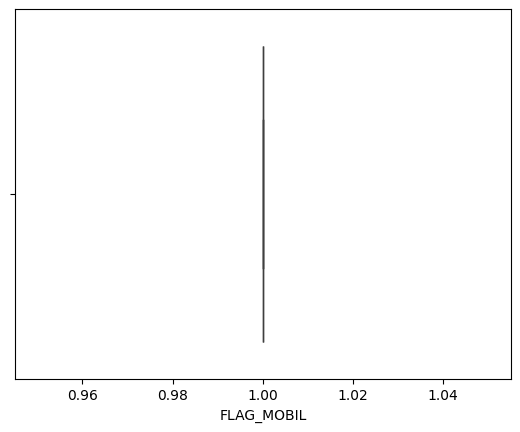

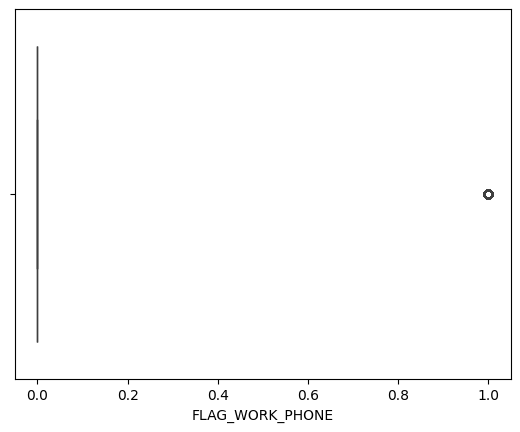

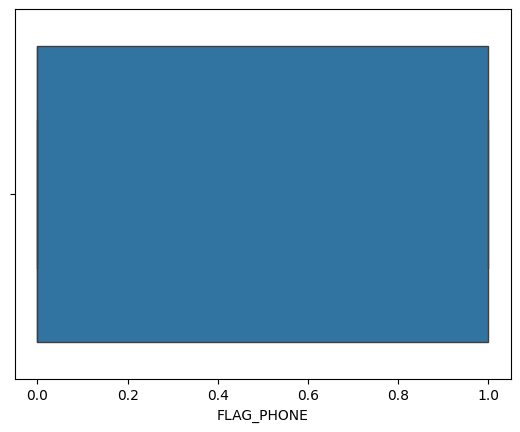

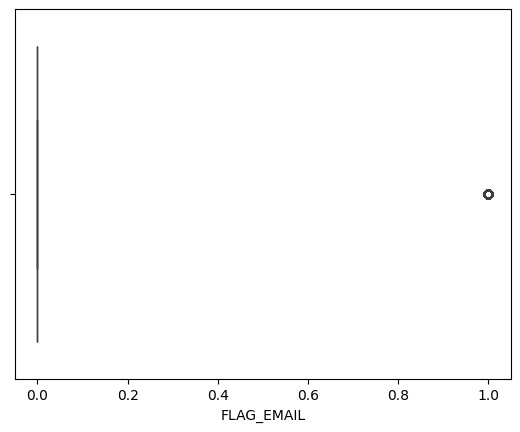

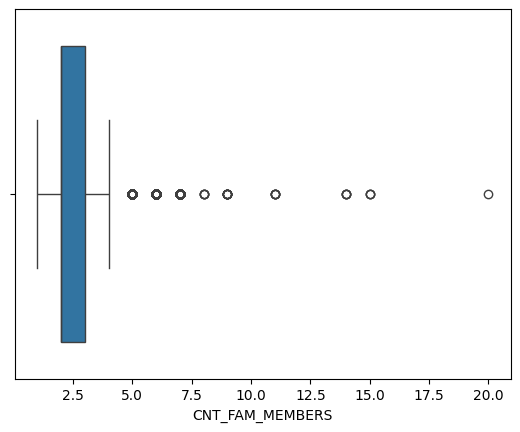

In [18]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

## Duplicates Treatment

## Removing records with IDs that are not in the second dataset (Including all the duplicated IDs)
  because all the duplicates of IDs don't exist at the second dataset with target

In [19]:
#Removing records with ID's that are not existing at the target dataset
duplicate_ids = df[df['ID'].duplicated(keep=False)]['ID'].unique()

# Get IDs from dataset2
ids_in_dataset2 = set(df_target['ID'])

# Filter duplicate IDs that are not in dataset2
duplicate_ids_to_drop = [id for id in duplicate_ids if id not in ids_in_dataset2]


df = df[~df['ID'].isin(duplicate_ids_to_drop)]


In [20]:
df.shape

(438463, 18)

In [21]:
#Number of unique records in a column
unique_counts = df.nunique()
print(unique_counts)

ID                     438463
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


# Missing values Treatment

## Dropping the OCCUPATION_TYPE column, as it won't affect the target and has 30% missing values (134k record)

In [22]:
df.drop(columns=['OCCUPATION_TYPE'], inplace=True)
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


# Handling DAYS_BIRTH column

As it represents number of days since birth, transforming it into years (Age) will be more effictive

In [23]:
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

#Dropping DAYS_BIRTH
df.drop(columns=['DAYS_BIRTH'], inplace=True)

# Handling the DAYS_EMPLOYED column

Since the DAYS_EMPLOYED column represents the days of working till the present day, then the positive numbers means unemployed. So will convert all the positive values to 0 (unemployed)

In [24]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

Then, will convert the negative days values into years

In [25]:
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED']) // 365

#Dropping DAYS_BIRTH
df.drop(columns=['DAYS_EMPLOYED'], inplace=True)

# Handling the FLAG_MOBIL column

Since all the values of FLAG_MOBIL are 1, then will drop it as it won't affect our target

In [26]:
df['FLAG_MOBIL'].value_counts()

,count
FLAG_MOBIL,
1,438463


In [27]:
df.drop(columns=['FLAG_MOBIL'], inplace=True)

#Dropping columns that won't affect our target

In [28]:
df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

df.drop('FLAG_PHONE', axis=1, inplace=True)

df.drop('FLAG_EMAIL', axis=1, inplace=True)

# EDA After updates

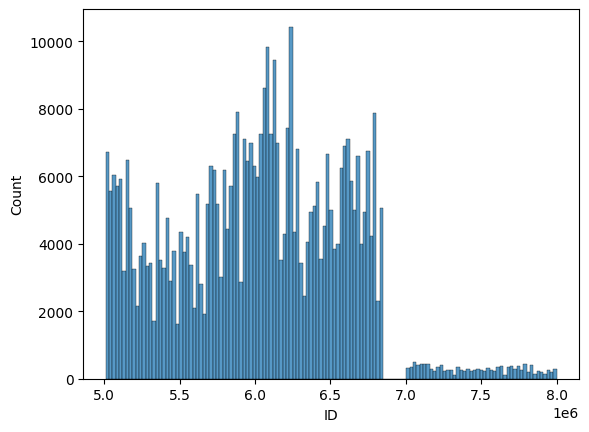

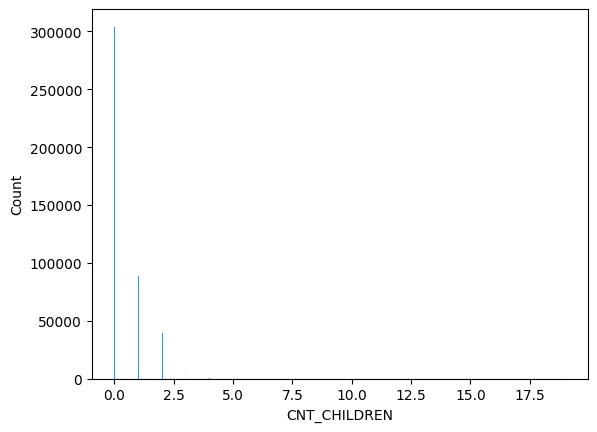

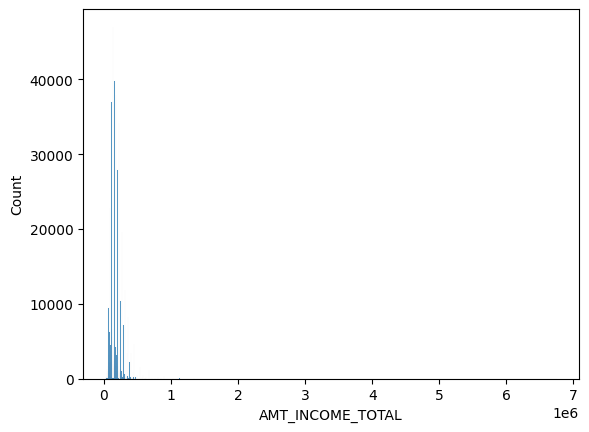

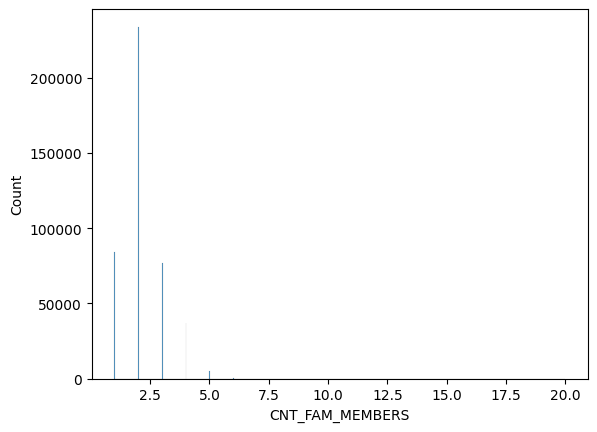

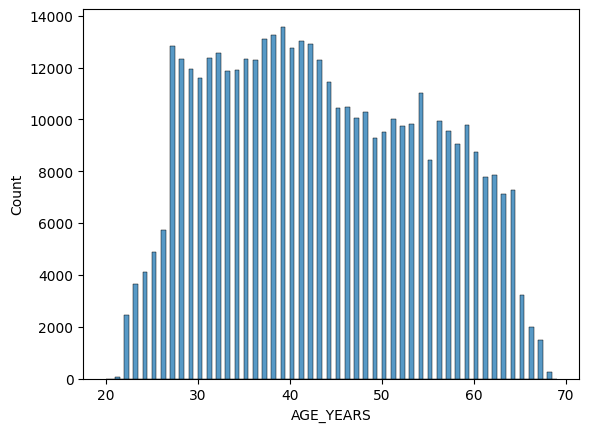

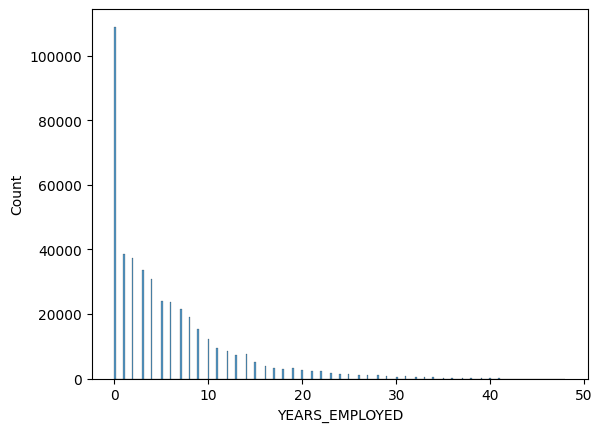

In [29]:
# histogram to understand data distribution

for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

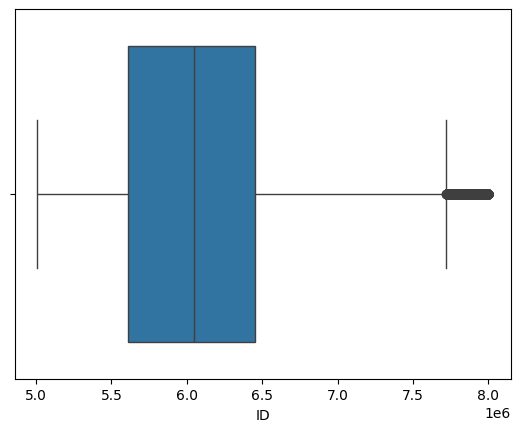

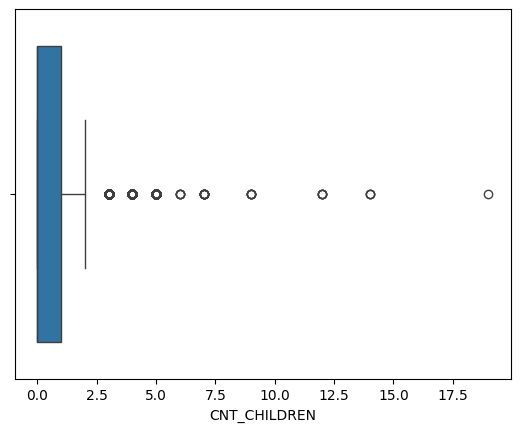

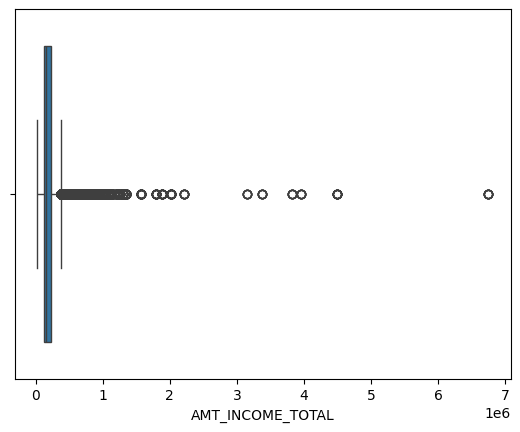

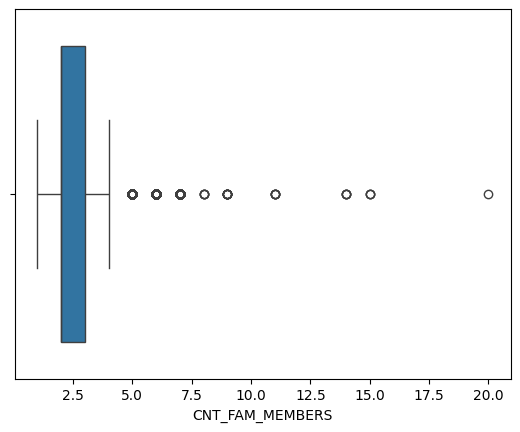

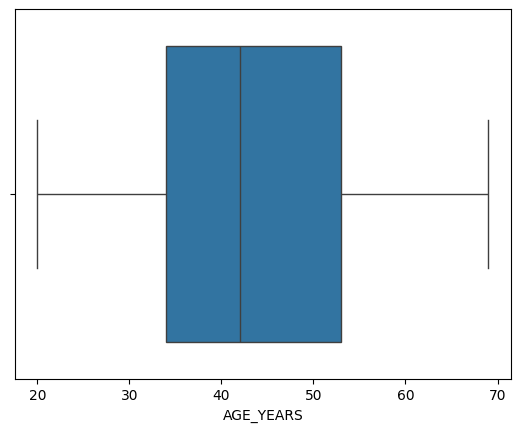

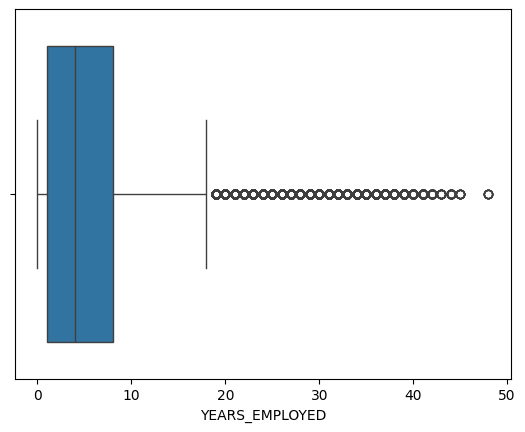

In [30]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

# Handling Outliers

##CNT_CHILDREN Outliers

In [31]:
#Handling using Standard Deviation Method
mean = df['CNT_CHILDREN'].mean()
std = df['CNT_CHILDREN'].std()
df = df[(df['CNT_CHILDREN'] >= mean - 3 * std) & (df['CNT_CHILDREN'] <= mean + 3 * std)]

##AMT_INCOME_TOTAL Outliers

In [32]:
#Handling using Interquartile Range (IQR)
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['AMT_INCOME_TOTAL'] >= lower_bound) & (df['AMT_INCOME_TOTAL'] <= upper_bound)]

##YEARS_EMPLOYED Outliers

In [33]:
#Handling using Interquartile Range (IQR)
Q1 = df['YEARS_EMPLOYED'].quantile(0.30)
Q3 = df['YEARS_EMPLOYED'].quantile(0.70)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['YEARS_EMPLOYED'] >= lower_bound) & (df['YEARS_EMPLOYED'] <= upper_bound)]


##CNT_FAM_MEMBERS Outliers

In [34]:
#This means 99.9% of the values in CNT_CHILDREN are less than or equal to this value of high bound
high_bound = df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
#This means 0.1% of the values in CNT_CHILDREN are less than or equal to this value of low bound
low_bound = df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

df = df[(df['CNT_FAM_MEMBERS']>=low_bound) & (df['CNT_FAM_MEMBERS']<=high_bound)]

high_bound : 4.0
low_bound : 1.0


#After Handling the Outliers

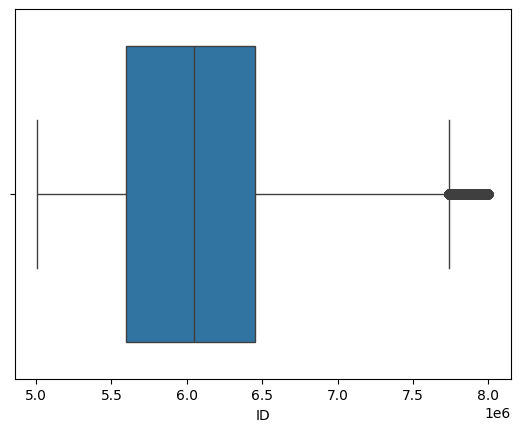

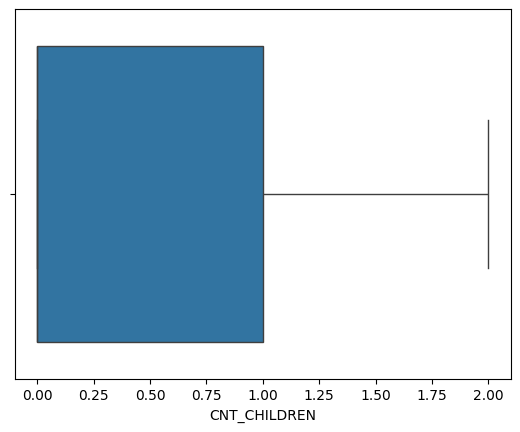

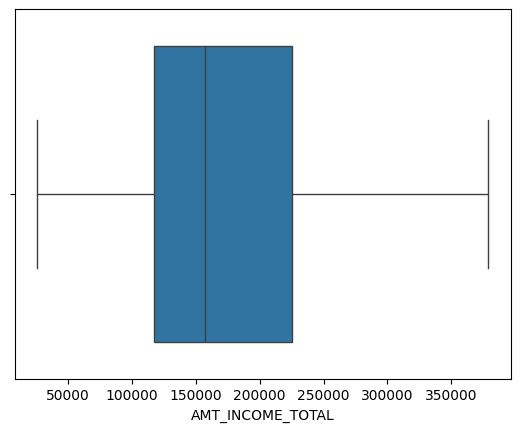

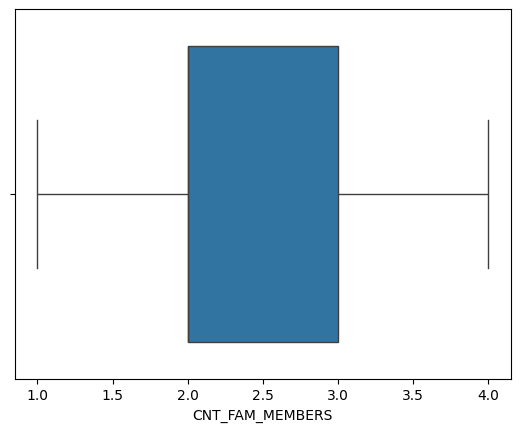

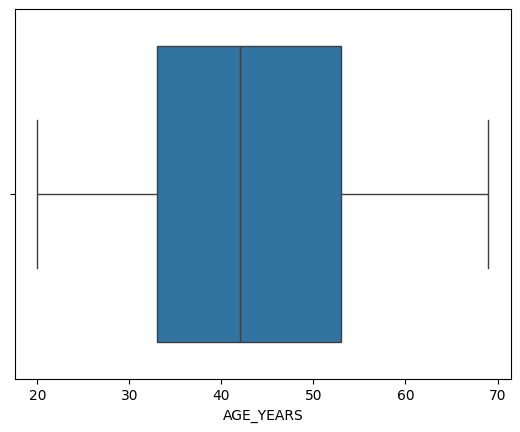

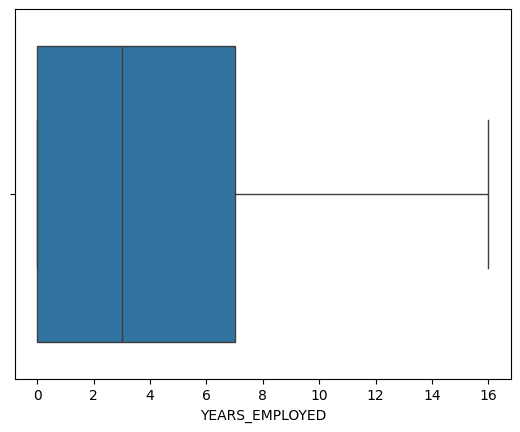

In [35]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [36]:
df['YEARS_EMPLOYED'].value_counts()

,count
YEARS_EMPLOYED,
0,105558
1,36407
2,35321
3,31524
4,28895
5,22333
6,22228
7,20002
8,17814


In [37]:
df.shape

(384832, 13)

# Sanity Check for the Second Dataset

In [38]:
df_target.shape

(1048575, 3)

In [39]:
#Number of missing values
df_target.isnull().sum()

#Result: No missing values

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [40]:
#Number of unique records in a column
unique_counts = df_target.nunique()
print(unique_counts)

#Result: there are only 45k unique ID only

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [41]:
# Showing ID's that are duplicated
id_counts = df_target['ID'].value_counts()

# Filter for IDs that appear more than once
duplicate_ids_summary = id_counts[id_counts > 1]

print(duplicate_ids_summary)

ID
5016769    61
5002806    61
5118192    61
5145767    61
5078567    61
           ..
5010600     2
5026232     2
5091346     2
5054131     2
5026231     2
Name: count, Length: 45586, dtype: int64


## Exploratory Data Analysis (EDA) on Second Dataset

In [42]:
df_target.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [43]:
df_target.describe(include = "object")

,STATUS
count,1048575
unique,8
top,C
freq,442031


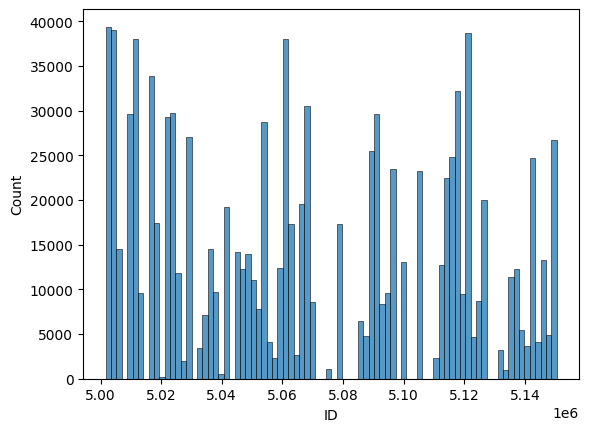

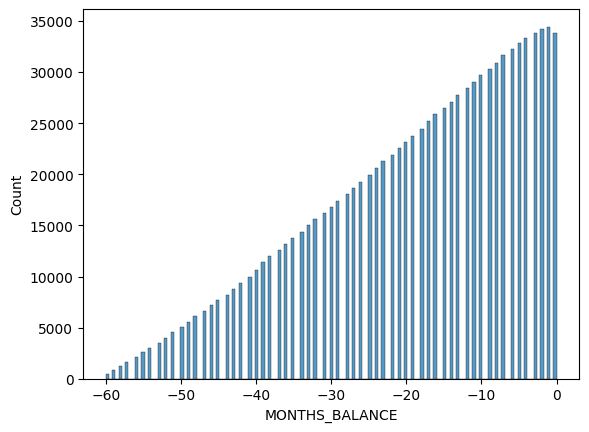

In [44]:
# histogram to understand data distribution

for i in df_target.select_dtypes(include= "number").columns:
  sns.histplot(data=df_target,x=i)
  plt.show()

In [45]:
df.shape

(384832, 13)

### - Detecting Outliers

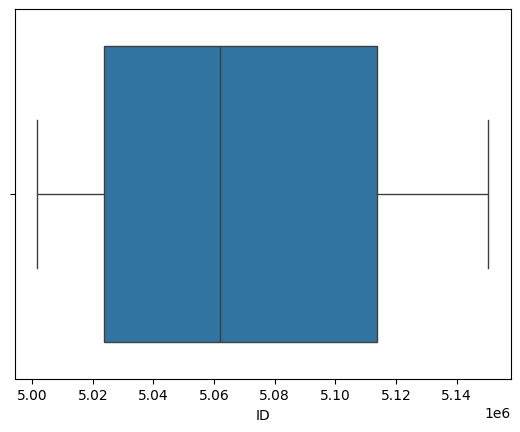

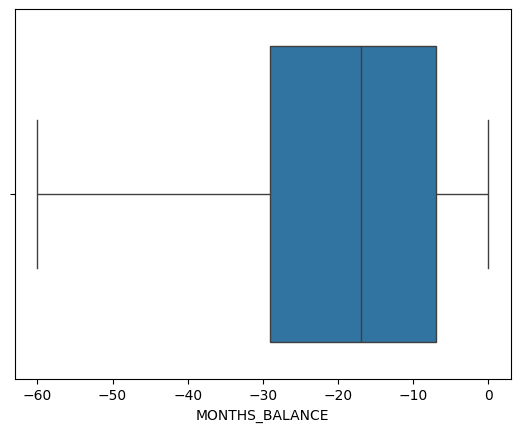

In [46]:
for i in df_target.select_dtypes(include= "number").columns:
  sns.boxplot(data=df_target,x=i)
  plt.show()

# Treating the duplicated IDs with Aggregation

In [47]:
df_target = df_target.groupby('ID').agg(max).reset_index()

<ipython-input-47-5368cce17274>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_target = df_target.groupby('ID').agg(max).reset_index()


# Dropping the MONTHS_BALANCE column

In [48]:
df_target.drop('MONTHS_BALANCE', axis=1, inplace=True)

In [49]:
df_target.head()

,ID,STATUS
0,5001711,X
1,5001712,C
2,5001713,X
3,5001714,X
4,5001715,X


# Merging the 2 Datasets

In [50]:
df_merged = pd.merge(df, df_target, on='ID', how='inner')

In [51]:
df_merged.shape

(32067, 14)

In [52]:
#Number of unique records in a column
unique_counts = df_merged.nunique()
print(unique_counts)

ID                     32067
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               3
AMT_INCOME_TOTAL         207
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
CNT_FAM_MEMBERS            4
AGE_YEARS                 49
YEARS_EMPLOYED            17
STATUS                     8
dtype: int64


# Dropping the ID column as it is all now has unique values

In [53]:
df_merged.drop('ID', axis=1, inplace=True)

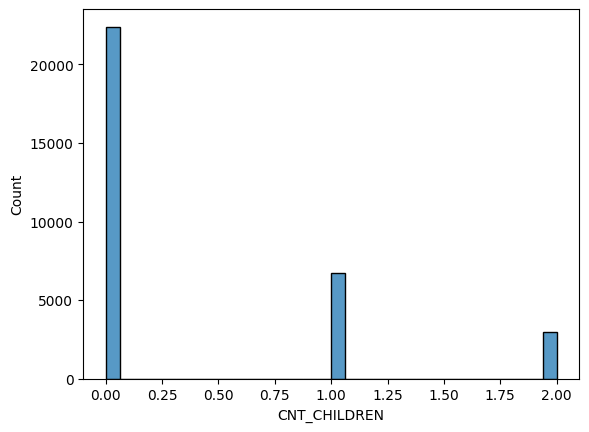

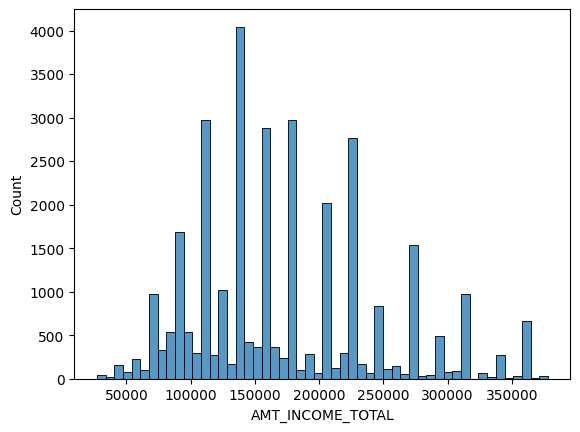

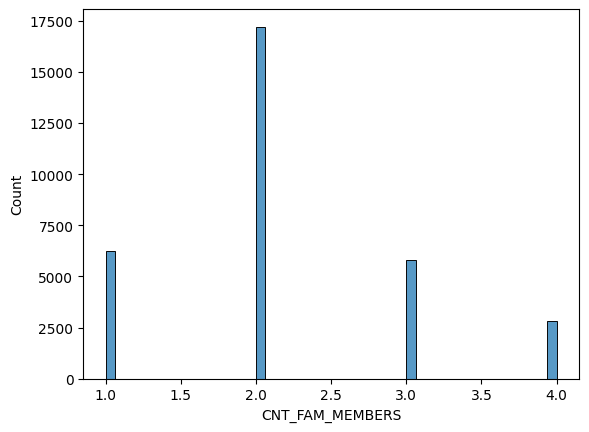

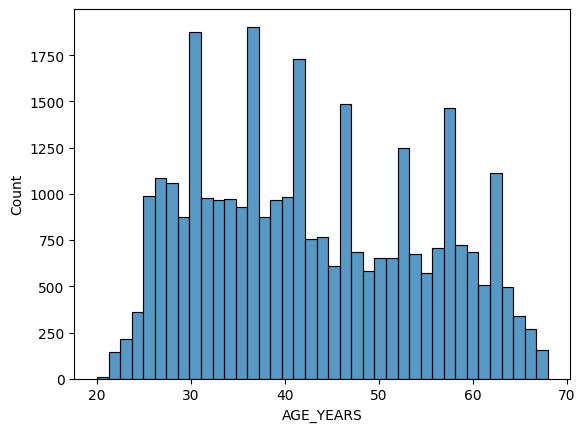

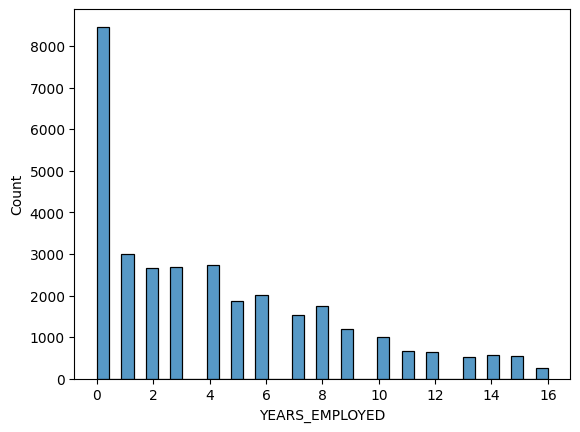

In [54]:
# histogram to understand data distribution

for i in df_merged.select_dtypes(include= "number").columns:
  sns.histplot(data=df_merged,x=i)
  plt.show()

In [55]:
df_merged['STATUS'] = df_merged['STATUS'].replace({'C': 0, 'X': 0, '0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1})

<ipython-input-55-2c2765c9584c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['STATUS'] = df_merged['STATUS'].replace({'C': 0, 'X': 0, '0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1})


In [56]:
df_merged

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,STATUS
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,2.0,47,6,0
32063,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,2.0,33,3,0
32064,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,2.0,33,3,0
32065,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,2.0,49,1,1


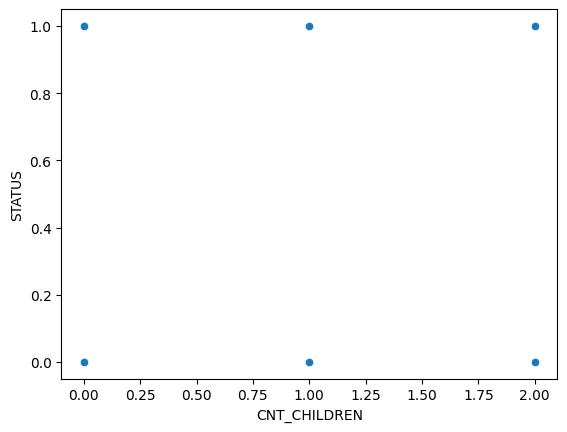

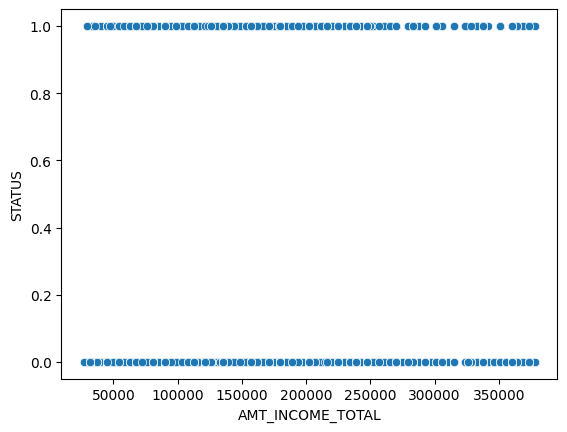

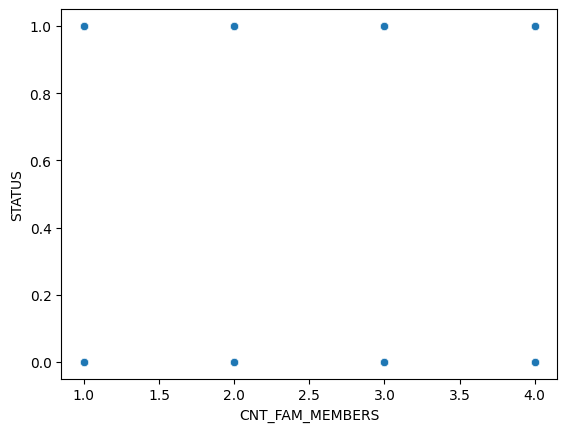

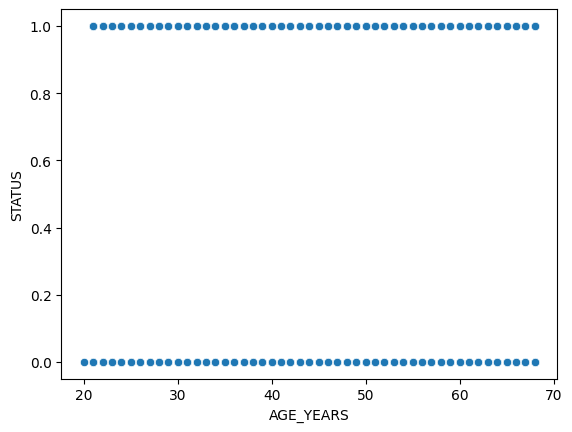

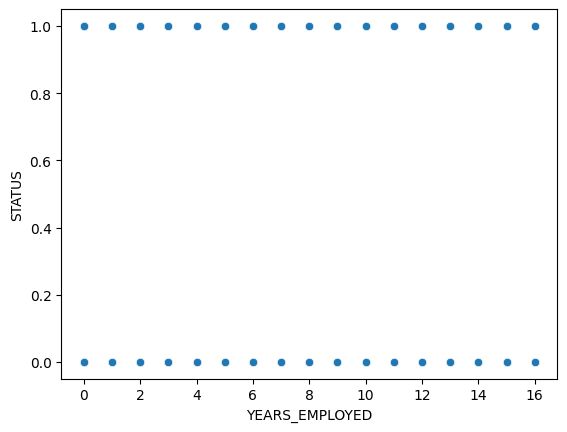

In [57]:
numeric_columns = df_merged.select_dtypes(include = "number").columns.drop('STATUS')
for i in numeric_columns:
  sns.scatterplot(data=df_merged, x =i,y = 'STATUS' )
  plt.show()

# Encoding

In [58]:
df_merged = pd.get_dummies(df_merged, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                                         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first = False)



In [59]:
#converting all the boolean to int
df_merged = df_merged.astype(int)

In [60]:
df_merged

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,STATUS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,112500,2,58,3,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,270000,1,52,8,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,270000,1,52,8,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,270000,1,52,8,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,270000,1,52,8,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,0,315000,2,47,6,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
32063,0,157500,2,33,3,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32064,0,157500,2,33,3,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32065,0,283500,2,49,1,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


# Standardization for Continues Data

In [61]:
df_merged.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'STATUS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_

In [62]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'CNT_FAM_MEMBERS',
    'AGE_YEARS',
    'YEARS_EMPLOYED'
]
scaler = StandardScaler()

df_merged[columns_to_standardize] = scaler.fit_transform(df_merged[columns_to_standardize])

print(df_merged.head())


   CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  AGE_YEARS  YEARS_EMPLOYED  \
0     -0.605632         -0.842982        -0.190941   1.272499       -0.296145   
1     -0.605632          1.364010        -1.386357   0.764646        0.894248   
2     -0.605632          1.364010        -1.386357   0.764646        0.894248   
3     -0.605632          1.364010        -1.386357   0.764646        0.894248   
4     -0.605632          1.364010        -1.386357   0.764646        0.894248   

   STATUS  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  ...  \
0       0              0              1               0               1  ...   
1       0              1              0               1               0  ...   
2       0              1              0               1               0  ...   
3       0              1              0               1               0  ...   
4       0              1              0               1               0  ...   

   NAME_FAMILY_STATUS_Married  N

In [63]:
df_merged

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,STATUS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,-0.605632,-0.842982,-0.190941,1.272499,-0.296145,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,-0.605632,1.364010,-1.386357,0.764646,0.894248,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.605632,1.364010,-1.386357,0.764646,0.894248,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,-0.605632,1.364010,-1.386357,0.764646,0.894248,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.605632,1.364010,-1.386357,0.764646,0.894248,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,-0.605632,1.994579,-0.190941,0.341435,0.418091,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
32063,-0.605632,-0.212413,-0.190941,-0.843555,-0.296145,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32064,-0.605632,-0.212413,-0.190941,-0.843555,-0.296145,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32065,-0.605632,1.553180,-0.190941,0.510720,-0.772302,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


# **4-Feature Selection: Apply Genetic Algorithms**

In [64]:
#  features and target variable
X = df_merged.drop('STATUS', axis=1).values
y = df_merged['STATUS'].values
# hena 2na 3amelt Split le 2l  data into training and validation ,test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# **Fitness function**

In [65]:

population_size = 20
generations = 50
mutation_rate = 0.1

num_features = X.shape[1]
population = np.random.randint(2, size=(population_size, num_features))


def fitness_function(chromosome):
    selected_features = X_train[:, chromosome == 1]
    if selected_features.shape[1] == 0:
        return 0
    model = DecisionTreeClassifier()
    model.fit(selected_features, y_train)
    predictions = model.predict(X_val[:, chromosome == 1])
    return accuracy_score(y_val, predictions)

# Genetic Algorithm

In [66]:
for generation in range(generations):
    # Evaluate fitness
    fitness_scores = np.array([fitness_function(chrom) for chrom in population])

    # Selection
    selected_indices = np.argsort(fitness_scores)[-population_size:]
    selected_population = population[selected_indices]

    # Crossover
    offspring = []
    for i in range(population_size // 2):
        parent1, parent2 = selected_population[np.random.choice(population_size, 2, replace=False)]
        crossover_point = np.random.randint(1, num_features - 1)
        child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
        offspring.append(child1)
        offspring.append(child2)
    offspring = np.array(offspring)

    # Mutation
    for child in offspring:
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(num_features)
            child[mutation_point] = 1 - child[mutation_point]

    # Replacement
    population = np.vstack((selected_population, offspring))
    population = population[np.argsort([fitness_function(chrom) for chrom in population])[-population_size:]]

# output of the best features

In [67]:
best_chromosome = population[np.argmax([fitness_function(chrom) for chrom in population])]
selected_features = np.where(best_chromosome == 1)[0]
print("Selected Features:", selected_features)

Selected Features: [ 2  6  8  9 11 13 16 18 22 28]


# List of feature names

In [68]:
selected_features_indices = [ 3 , 5 ,10 ,13 ,16 ,17 ,21 ,22 ,24 ,26 ,29, 31]

feature_names = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'CNT_FAM_MEMBERS',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'STATUS',
    'CODE_GENDER_F',
    'CODE_GENDER_M',
    'FLAG_OWN_CAR_N',
    'FLAG_OWN_CAR_Y',
    'FLAG_OWN_REALTY_N',
    'FLAG_OWN_REALTY_Y',
    'NAME_INCOME_TYPE_Commercial associate',
    'NAME_INCOME_TYPE_Pensioner',
    'NAME_INCOME_TYPE_State servant',
    'NAME_INCOME_TYPE_Student',
    'NAME_INCOME_TYPE_Working',
    'NAME_EDUCATION_TYPE_Academic degree',
    'NAME_EDUCATION_TYPE_Higher education',
    'NAME_EDUCATION_TYPE_Incomplete higher',
    'NAME_EDUCATION_TYPE_Lower secondary',
    'NAME_EDUCATION_TYPE_Secondary / secondary special',
    'NAME_FAMILY_STATUS_Civil marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single / not married',
    'NAME_FAMILY_STATUS_Widow',
    'NAME_HOUSING_TYPE_Co-op apartment',
    'NAME_HOUSING_TYPE_House / apartment',
    'NAME_HOUSING_TYPE_Municipal apartment',
    'NAME_HOUSING_TYPE_Office apartment',
    'NAME_HOUSING_TYPE_Rented apartment',
    'NAME_HOUSING_TYPE_With parents'
]

selected_feature_names = [feature_names[i] for i in selected_features_indices]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ['AGE_YEARS', 'STATUS', 'FLAG_OWN_REALTY_N', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Rented apartment']


# **Multi-layer preception Model (MLP)**

In [69]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

print(f'Training set size: {len(X_train)} samples')
print(f'Validation set size: {len(X_val)} samples')
print(f'Test set size: {len(X_test)} samples')


Training set size: 22445 samples
Validation set size: 4811 samples
Test set size: 4811 samples


## **Selected feature indices from genetic algorithm**

In [70]:
X_train = X_train[:, selected_features_indices]
X_val = X_val[:, selected_features_indices]
X_test = X_test[:, selected_features_indices]

## **Feature scaling**

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## **Calculate class weights manually to handle imbalance**

In [72]:
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

## **Define focal loss function**

In [73]:
def focal_loss(gamma=2, alpha=0.25):
    def loss(y_true, y_pred):
        bce = BinaryCrossentropy()(y_true, y_pred)
        p_t = tf.where(y_true == 1, y_pred, 1 - y_pred)
        fl = alpha * (1 - p_t) ** gamma * bce
        return fl
    return loss

## **Build the multi-layer perceptron neural network**

In [74]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Input layer with L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Hidden layer with L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Hidden layer with L2 regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the model with Adam optimizer and learning rate scheduler**

In [75]:
optimizer = Adam(learning_rate=0.0005)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer=optimizer, loss=focal_loss(), metrics=['accuracy', Precision(), Recall()])


## **Train the MLP model**

In [76]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6673 - loss: 1.3265 - precision: 0.1503 - recall: 0.2927 - val_accuracy: 0.8626 - val_loss: 0.0486 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8634 - loss: 0.0501 - precision: 0.1254 - recall: 9.1121e-04 - val_accuracy: 0.8628 - val_loss: 0.0203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8606 - loss: 0.0378 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8628 - val_loss: 0.0192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/200
702/702 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8617 - loss: 0.0367 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8628 - val_loss: 0.0182 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0

## **Evaluate the model on the training set**


In [77]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)[:2]

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

Training Loss: 0.017608534544706345
Training Accuracy: 0.861929178237915


## **Evaluate the model on the validation set**


In [78]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)[:2]

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Validation Loss: 0.01753365993499756
Validation Accuracy: 0.8628143668174744


## **Evaluate the model on the test set**

In [79]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)[:2]

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.0184 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss: 0.017835494130849838
Test Accuracy: 0.8590729832649231


## **Generate predictions**

In [80]:
y_pred_prob = model.predict(X_test)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [81]:
threshold = 0.3045  # Slightly lower threshold, aiming for a better balance
y_pred = (y_pred_prob >= threshold).astype(int)

## **Confusion Matrix**

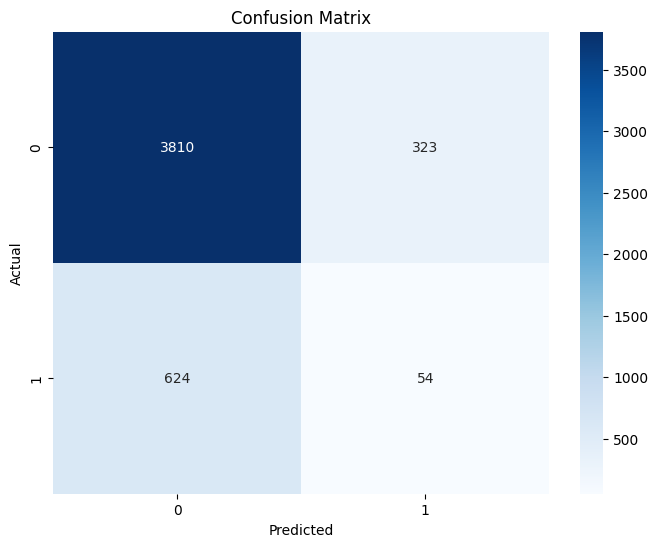

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Classification Report**

In [83]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4133
           1       0.14      0.08      0.10       678

    accuracy                           0.80      4811
   macro avg       0.50      0.50      0.50      4811
weighted avg       0.76      0.80      0.78      4811



## **Plot training and validation accuracy/loss**

In [84]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

## **Plot accuracy**

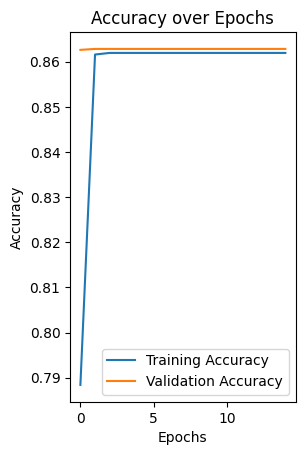

In [85]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## **Plot loss**


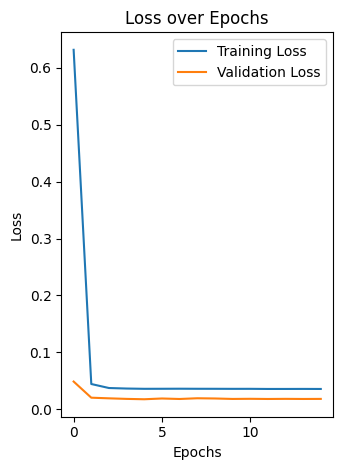

In [86]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Calculate and plot the ROC curve**

This curve is useful for imbalanced datasets, focusing on the tradeoff between precision and recall.

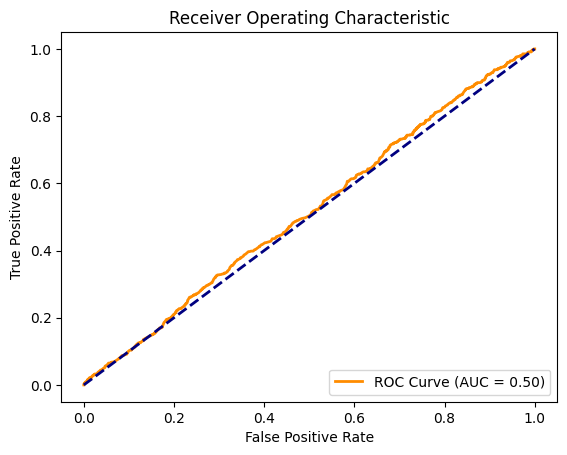

In [87]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## **Calculate Precision-Recall (PR) curve**

This curve is useful for imbalanced datasets, focusing on the tradeoff between precision and recall.

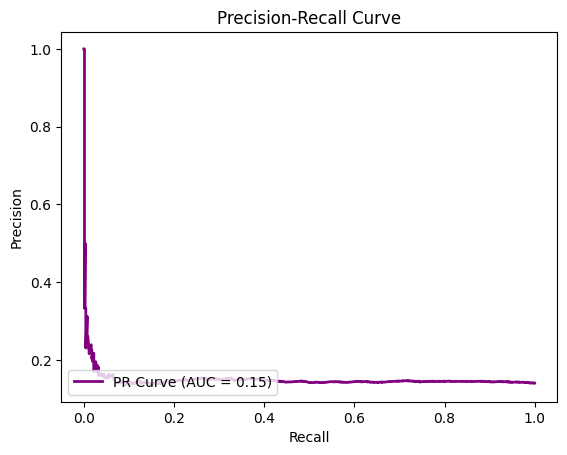

In [88]:
# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## **Calculate Cohen's Kappa**

Cohen's Kappa measures agreement between the predicted and true labels, accounting for agreement by chance.

In [89]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

Cohen's Kappa: 0.0018


## **Log-Loss**

Logarithmic loss evaluates how close the predicted probabilities are to the true labels.

In [90]:
logloss = log_loss(y_test, y_pred_prob)
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.4756


## **Matthews Correlation Coefficient (MCC)**

The MCC is a balanced measure that considers all confusion matrix categories.

In [91]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

Matthews Correlation Coefficient: 0.0019


## **F-beta Score**

The F-beta score allows you to weigh precision and recall differently. For example, F2 prioritizes recall over precision.

In [92]:
f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2_score:.4f}")

F2 Score: 0.0874


## **Save MLP Model**

In [93]:
# Save the trained model
model.save('MLP.keras')
print("Model saved successfully.")

Model saved successfully.


# **Decision Tree Classifier Model**


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
y = df_merged['STATUS']
x = df_merged.drop('STATUS', axis=1)

In [96]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# **Accuracy of the model**

In [99]:
from sklearn.metrics import accuracy_score

# Evaluate on the validation set

In [100]:
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)*100
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 84.17465926299849


# Evaluate on the test set

In [101]:
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred) *100
print("Accuracy:", accuracy)

Accuracy: 84.58580189169524


# Evaluate on the train set

In [102]:
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred) *100
print("Accuracy:", accuracy)

Accuracy: 90.9705691408786


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.15825340737001514
Mean Squared Error: 0.15825340737001514
R-squared: -0.34433729462952156


# Confusion matrix of the decision tree

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[7897,  393],
       [1090,  241]])

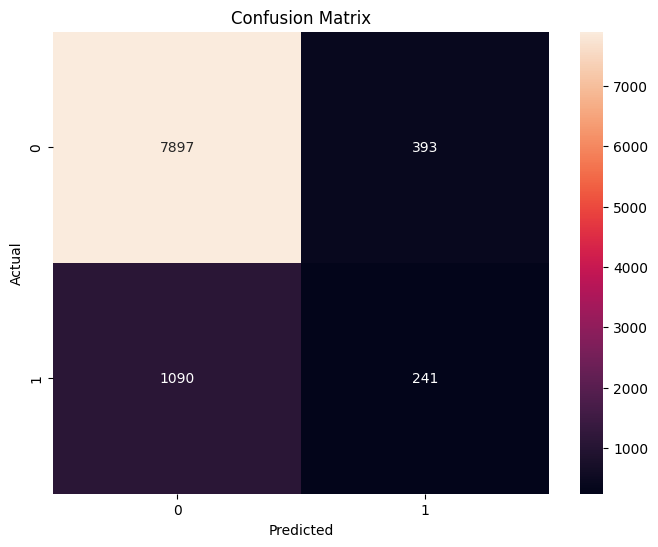

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report of Decision tree

In [108]:
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8290
           1       0.38      0.18      0.25      1331

    accuracy                           0.85      9621
   macro avg       0.63      0.57      0.58      9621
weighted avg       0.81      0.85      0.82      9621



# **KNN Model**

# Split the data

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# First split: Train + Validation and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)


In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluate on the validation set


In [113]:
score = knn.score(X_val, y_val) *100
print("Validation Accuracy:", score)

Validation Accuracy: 84.47753659767794


# Evaluate on the test set

In [114]:
score = knn.score(X_test, y_test) *100
print("Test Accuracy:", score)

Test Accuracy: 84.73131691092402


# Evaluate on the train set

In [115]:
score = knn.score(X_train, y_train) *100
print("Train Accuracy:", score)

Train Accuracy: 87.61090673014499


#Confusion mtrix of KNN

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
y_pred = knn.predict(X_test)

In [118]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[8022,  268],
       [1201,  130]])

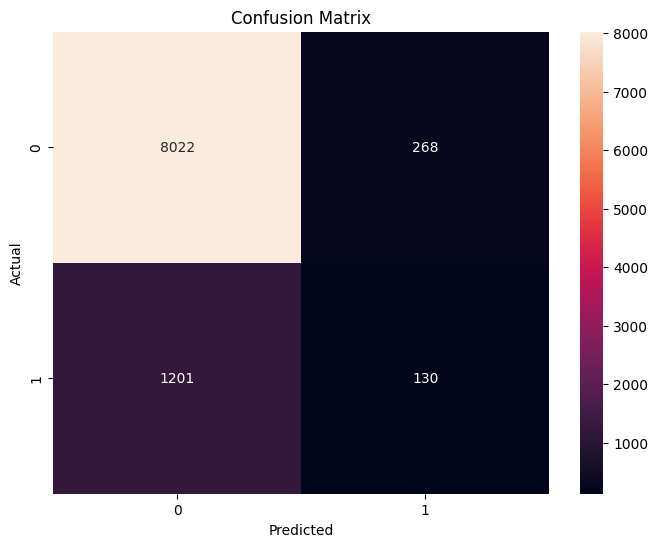

In [119]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [121]:
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.15825340737001514
Mean Squared Error: 0.15825340737001514
R-squared: -0.34433729462952156


# Classification report of KNN

In [122]:
from sklearn.metrics import classification_report

In [123]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8290
           1       0.33      0.10      0.15      1331

    accuracy                           0.85      9621
   macro avg       0.60      0.53      0.53      9621
weighted avg       0.79      0.85      0.81      9621



# **SVM Model**

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# First split: Train + Validation and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Train the model

In [126]:
from sklearn import svm

In [127]:
svm_model = svm.SVC(kernel='linear', gamma='auto', C=2)
svm_model.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [128]:
y_pred = svm_model.predict(X_test)

# Evaluate on the validation set

In [129]:
score = svm_model.score(X_val, y_val) *100
print("Validation Accuracy:", score)

Validation Accuracy: 86.37051993942453


# Evaluate on the test set

In [130]:
score = svm_model.score(X_test, y_test) *100
print("Test Accuracy:", score)

Test Accuracy: 86.1656792433219


# Evaluate on the train model

In [131]:
score = svm_model.score(X_train, y_train) *100
print("Train Accuracy:", score)

Train Accuracy: 86.1177234364856


# Confusion matrix on SVM

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[8290,    0],
       [1331,    0]])

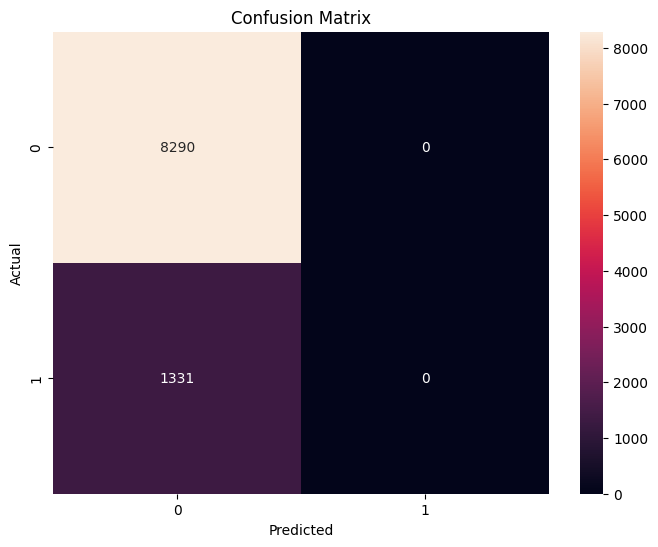

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report on SVM

In [135]:
from sklearn.metrics import classification_report

In [136]:
classification_rep = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      8290
           1       0.00      0.00      0.00      1331

    accuracy                           0.86      9621
   macro avg       0.43      0.50      0.46      9621
weighted avg       0.74      0.86      0.80      9621



# **Random Forest Model**

In [137]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

print(f'Training set size: {len(X_train)} samples')
print(f'Validation set size: {len(X_val)} samples')
print(f'Test set size: {len(X_test)} samples')

X_train = X_train[:, selected_features_indices]
X_val = X_val[:, selected_features_indices]
X_test = X_test[:, selected_features_indices]

Training set size: 22445 samples
Validation set size: 4811 samples
Test set size: 4811 samples


## **Train Random Forest Classifier**

In [138]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Evaluate on train set**

In [140]:
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

## **Evaluate on validation set**

In [141]:
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

## **Evaluate on test set**

In [142]:
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

## **Print evaluation metrics**

In [143]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.87
Validation Accuracy: 0.86
Test Accuracy: 0.86


## **Detailed classification report for the test set**

In [144]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4133
           1       0.41      0.05      0.08       678

    accuracy                           0.86      4811
   macro avg       0.64      0.52      0.50      4811
weighted avg       0.80      0.86      0.80      4811



## **Confusion matrix for the test set**

In [145]:
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Set):
[[4087   46]
 [ 646   32]]


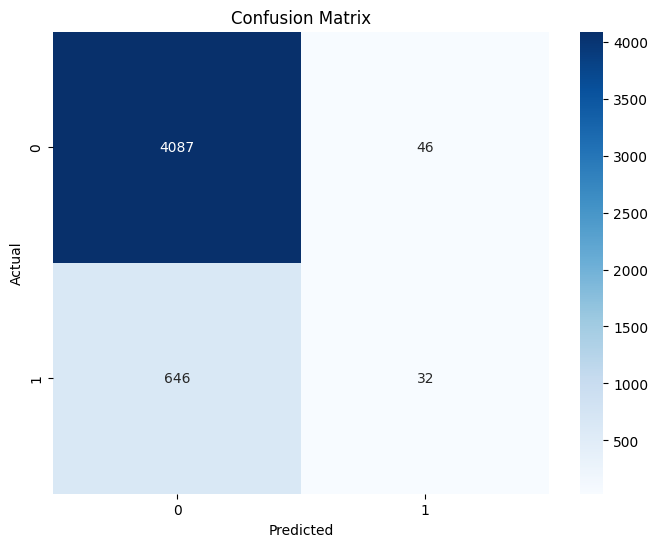

In [147]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **compute ROC-AUC and plot ROC curve**

In [148]:
if len(np.unique(y_test)) == 2:
    y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

    print(f"\nTest ROC-AUC Score: {auc_score:.2f}")


Test ROC-AUC Score: 0.59


## **Plot the ROC curve**

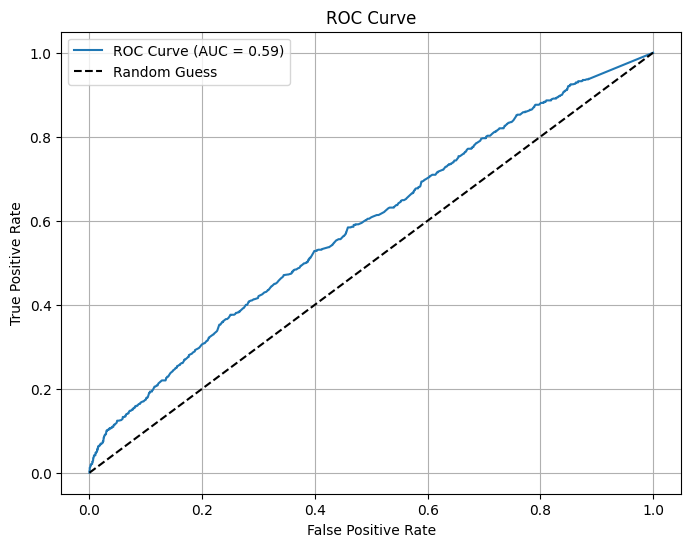

In [150]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## **Cohen's Kappa Metric**

In [151]:
# Cohen's Kappa for validation set
val_kappa = cohen_kappa_score(y_val, y_val_pred)
print(f"Validation Set Cohen's Kappa: {val_kappa:.2f}")

# Cohen's Kappa for test set
test_kappa = cohen_kappa_score(y_test, y_test_pred)
print(f"Test Set Cohen's Kappa: {test_kappa:.2f}")

Validation Set Cohen's Kappa: 0.05
Test Set Cohen's Kappa: 0.06


## **Matthews Correlation Coefficient (MCC)**

In [153]:
# MCC for validation set
val_mcc = matthews_corrcoef(y_val, y_val_pred)
print(f"Validation Set MCC: {val_mcc:.2f}")

# MCC for test set
test_mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Test Set MCC: {test_mcc:.2f}")

Validation Set MCC: 0.09
Test Set MCC: 0.10
